# Front Page DeepExplainer MNIST Example

A simple example showing how to explain an MNIST CNN trained using Keras with DeepExplainer.

In [1]:
# this is the code from https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras import backend as K
import shap
import numpy as np

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

try:
    print("Try to load model")
    model = keras.models.load_model("fpddem.hdf5", compile=False)
except OSError:
    print("Model does not exist, train")

    #model = Sequential()
    #model.add(Conv2D(32, kernel_size=(3, 3),
    #                 activation='relu',
    #                 input_shape=input_shape))
    #model.add(Conv2D(64, (3, 3), activation='relu'))
    #model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(0.25))
    #model.add(Flatten())
    #model.add(Dense(128, activation='relu'))
    #model.add(Dropout(0.5))
    #model.add(Dense(num_classes, activation='softmax'))

    #model.compile(loss=keras.losses.categorical_crossentropy,
    #              optimizer=keras.optimizers.Adadelta(),
    #              metrics=['accuracy'])

    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, y_test))

    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    model.save("fpddem.hdf5")

print("Model stuff done")

Using TensorFlow backend.


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Try to load model
Model does not exist, train
Epoch 1/12
469/469 [==============================] - 13s 27ms/step - loss: 0.1974 - accuracy: 0.9373 - val_loss: 0.0642 - val_accuracy: 0.9812
Epoch 2/12
469/469 [==============================] - 12s 26ms/step - loss: 0.0587 - accuracy: 0.9819 - val_loss: 0.0416 - val_accuracy: 0.9868
Epoch 3/12
469/469 [==============================] - 13s 27ms/step - loss: 0.0422 - accuracy: 0.9872 - val_loss: 0.0376 - val_accuracy: 0.9868
Epoch 4/12
469/469 [==============================] - 12s 26ms/step - loss: 0.0330 - accuracy: 0.9894 - val_loss: 0.0304 - val_accuracy: 0.9906
Epoch 5/12
469/469 [==============================] - 12s 26ms/step - loss: 0.0262 - accuracy: 0.9915 - val_loss: 0.0297 - val_accuracy: 0.9900
Epoch 6/12
469/469 [==============================] - 12s 26ms/step - loss: 0.0210 - accuracy: 0.9934 - val_loss: 0.0363 - val_accuracy: 0.9881
Epoch 7/12
469/46

In [9]:
# ...include code from https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

# select a set of background examples to take an expectation over
background = x_train[np.random.choice(x_train.shape[0], 500, replace=False)]

# explain predictions of the model on three images
e = shap.DeepExplainer(model, background)
# ...or pass tensors directly
# e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)
shap_values = e.shap_values(x_test[1:5])

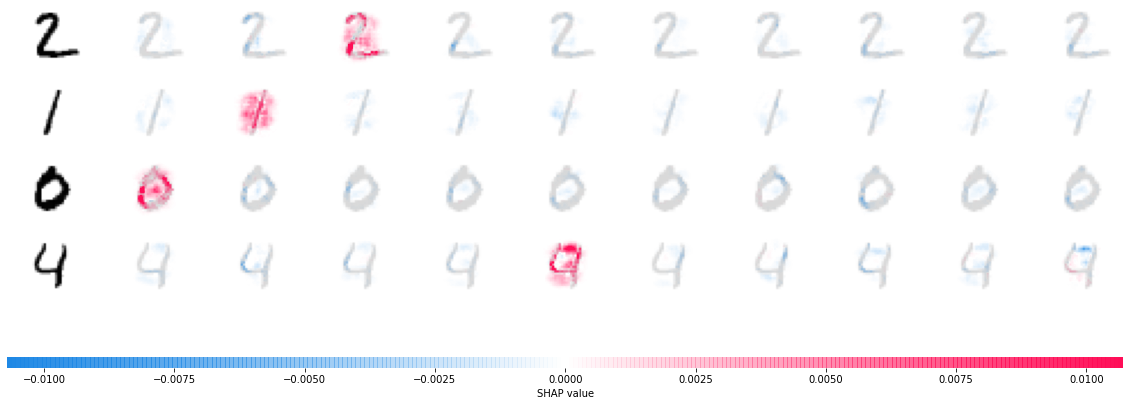

In [3]:
# plot the feature attributions
shap.image_plot(shap_values, -x_test[1:5])

The plot above shows the explanations for each class on four predictions. Note that the explanations are ordered for the classes 0-9 going left to right along the rows.